### Make cute informative figs

In [1]:

import numpy as np
import mediapipe as mp
import pickle
from prepare_data import parse_image_folder
from extract_features import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import cv2
from extract_features import FeaturesMP
seed = 333

In [2]:
# still image dataset path
directory = "/Users/alejandraduran/Documents/Pton_courses/COS429/COS429_final_project/image_data"

# get standardized images and labels
X, labels, df, encoder = parse_image_folder(directory, return_label_encoder=True)

# save the labels (LabelEncoder() object)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

print('Number of images:', len(X))

print("shape of an image:", X[0].shape)

Number of images: 2754
shape of an image: (256, 256, 3)


I0000 00:00:1734060256.239197 22268930 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


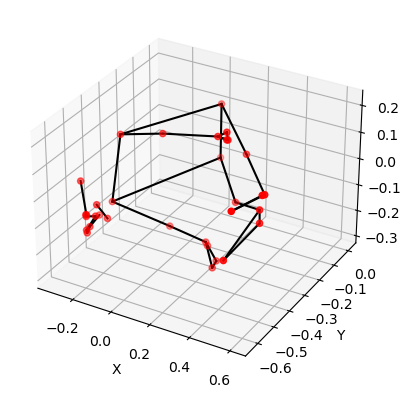

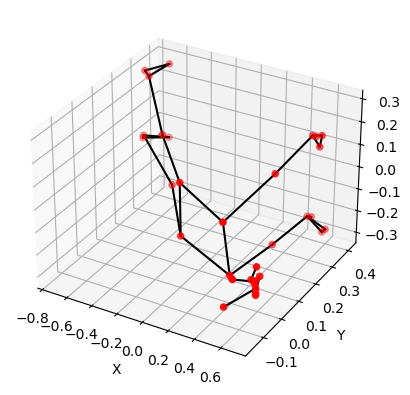

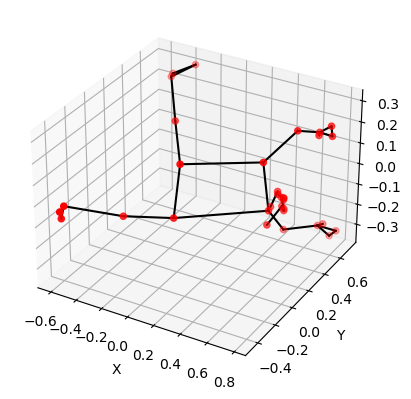

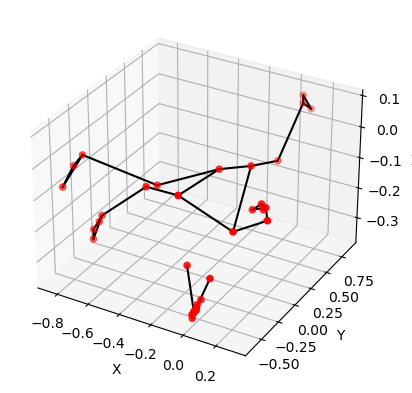

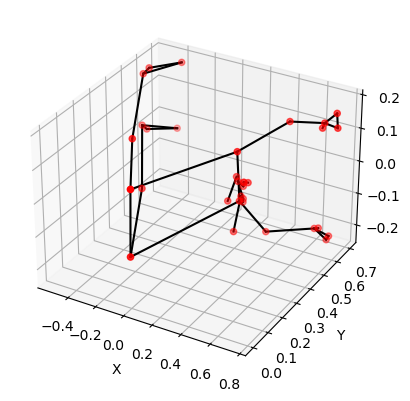

In [3]:

# extract landmarks: MEDIAPIPE 
min_pose_detection_confidence = 0.7  # biggest effect
min_pose_presence_confidence = 0.5
min_tracking_confidence = 0.5

mp_model_path = "../pretrained_models/pose_landmarker_heavy.task"
# Initialize FeaturesMP object
features_mp = FeaturesMP(mp_model_path)
# Initialize detector
features_mp.init_detector(min_pose_detection_confidence=min_pose_detection_confidence,
                              min_pose_presence_confidence=min_pose_presence_confidence,
                              min_tracking_confidence=min_tracking_confidence,)

x_data = np.zeros((len(X), features_mp.n_landmarks * 4))  # For pose landmarks
y_data = np.zeros(labels.shape)  # For labels

ips = [10,100,200,300,400,500]

# run inference on every image
for i in ips:
    landmarks = features_mp.detect(X[i])
    # only include images with detected landmarks
    if landmarks is not None:
        # with detected poses
        if len(landmarks.pose_landmarks) != 0:
            #x_data[i], y_data[i] = features_mp.format_landmark(landmarks, encoded_label=labels[i], rot_invariant=True)
            
            # draw only as normalized
            features_mp.draw_3d_landmarks(landmarks)
            last_landmarks = landmarks   

In [ ]:
# now apply trans to last landmarks and plot them